In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min
#conda install fitter


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

## Introduction


In [230]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


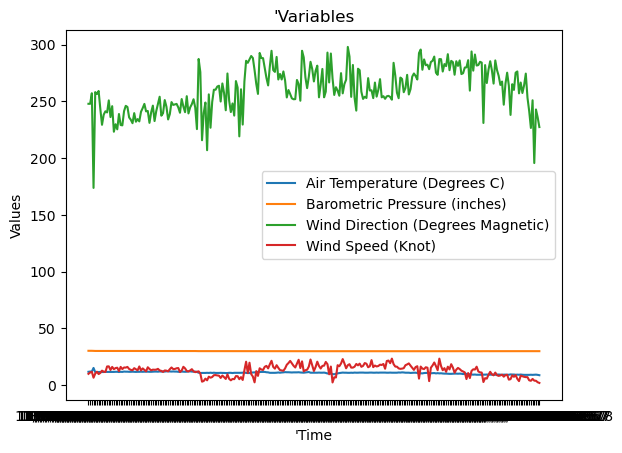

In [231]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [232]:
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
#plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
#plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [233]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [234]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [235]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [236]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [237]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [238]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


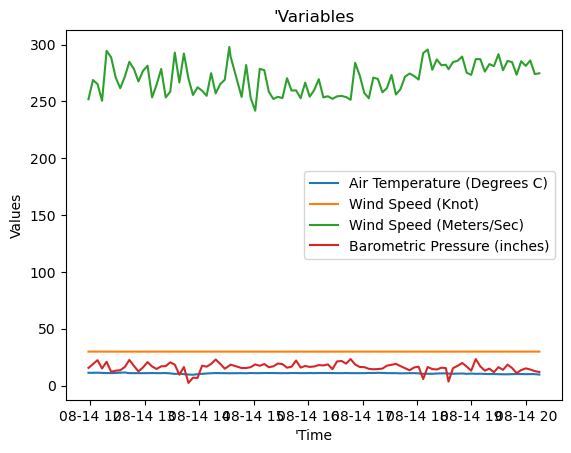

In [239]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [240]:
#df3

In [241]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


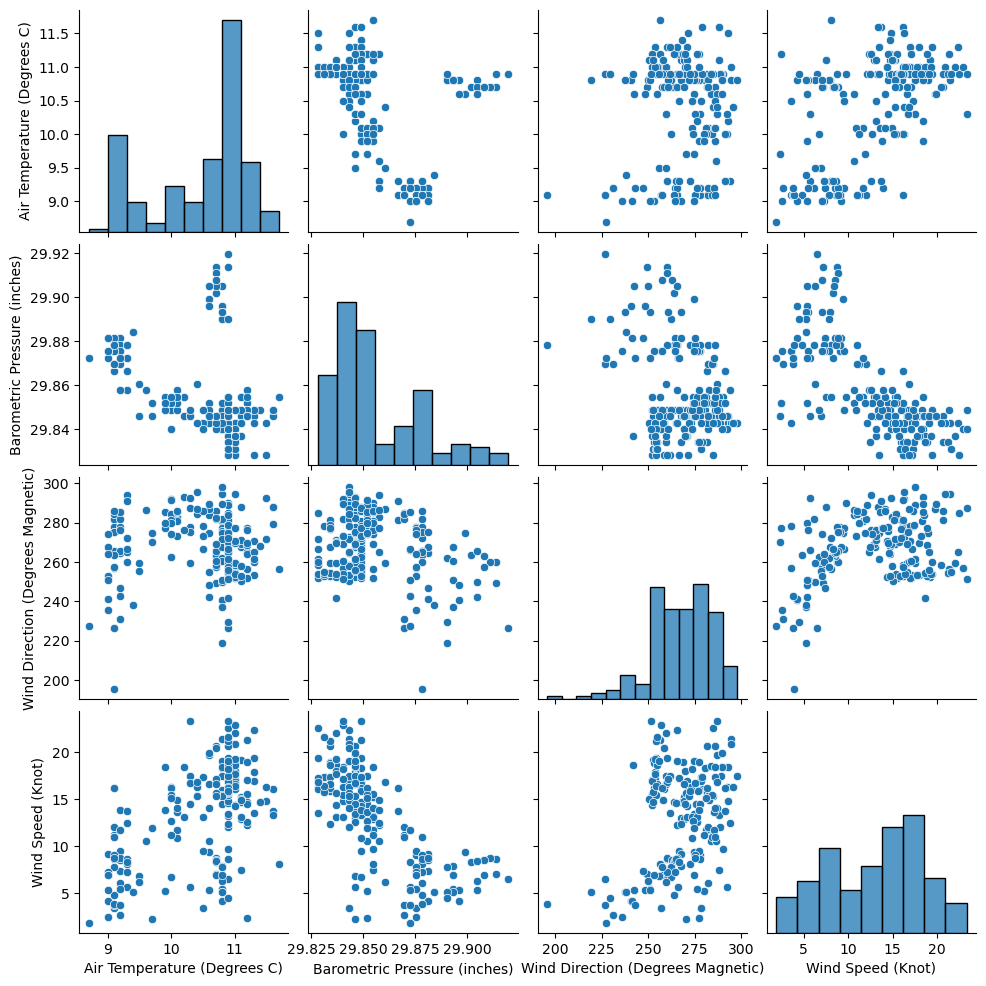

In [242]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

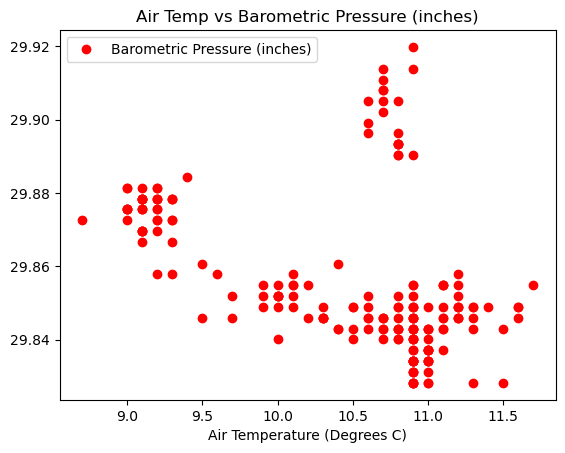

In [243]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

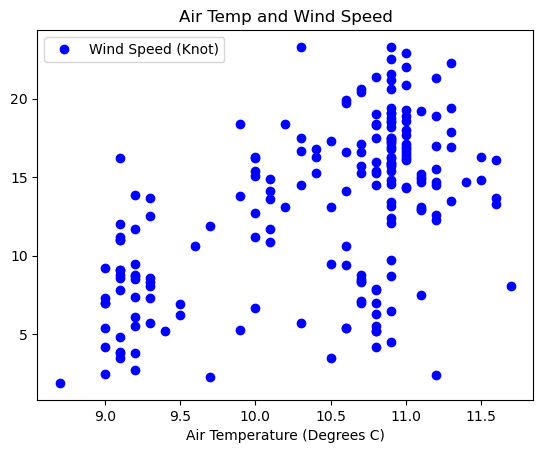

In [244]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [245]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

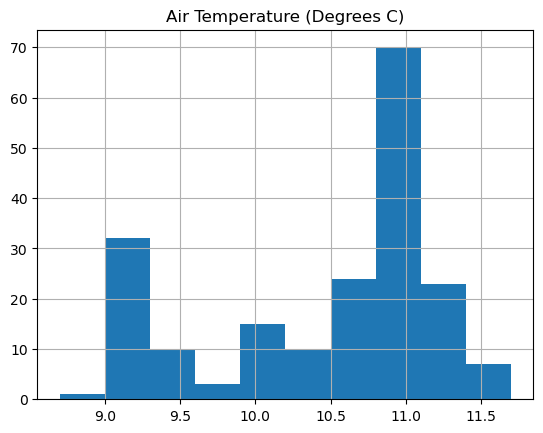

In [246]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [247]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               '2023-11-08 00:10:33', '2023-11-08 00:11:33',
               '2023-11-08 00:12:33', '2023-11-08 00:13:33',
               '2023-11-08 00:14:33', '2023-11-08 00:15:33',
               '2023-11-08 00:16:33', '2023-11-08 00:17:33',
               '2023-11-08 00:18:33', '2023-11-08 00:19:33',
               '2023-11-08 00:20:33', '2023-11-08 00:21:33',
               '2023-11-08 00:22:33', '2023-11-08 00:23:33',
               '2023-11-08 00:24:33', '2023-11-08 00:25:33',
               '2023-11-08 00:26:33', '2023-11-08 00:27:33',
               '2023-11-08 00:28:33', '2023-11-08 00:29:33',
               '2023-11-08 00:30:33', '2023-11-08 00:31:33',
               '2023-11-

In [248]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.4225, .7669
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,11.141999
2023-11-08 00:01:33,9.933774
2023-11-08 00:02:33,10.664111
2023-11-08 00:03:33,9.289299
2023-11-08 00:04:33,10.099263
...,...
2023-11-08 01:35:33,10.875410
2023-11-08 01:36:33,10.718988
2023-11-08 01:37:33,10.716222
2023-11-08 01:38:33,10.479518


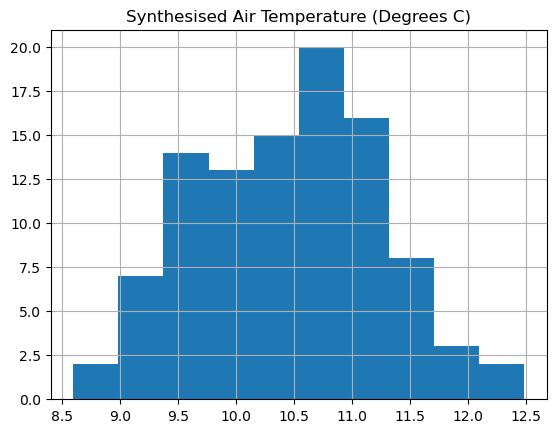

In [249]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Air Temperature (Degrees C)'>

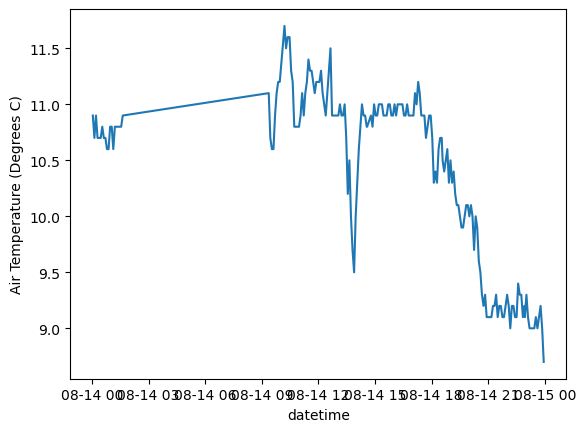

In [250]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

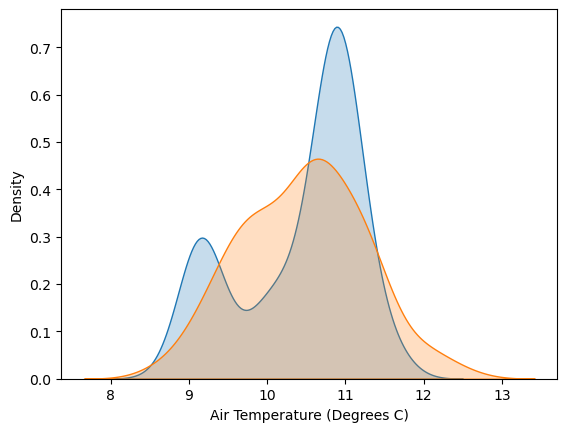

In [251]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)


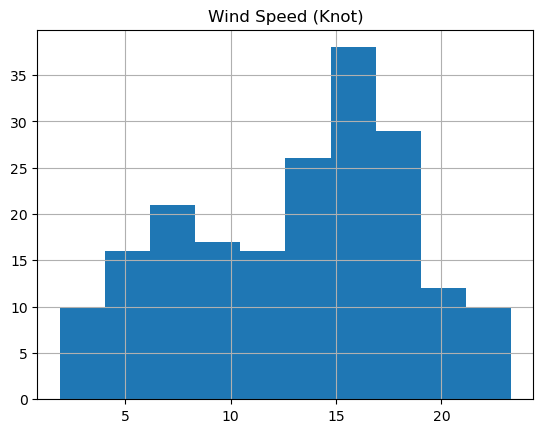

In [252]:
df3.hist('Wind Speed (Knot)')
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

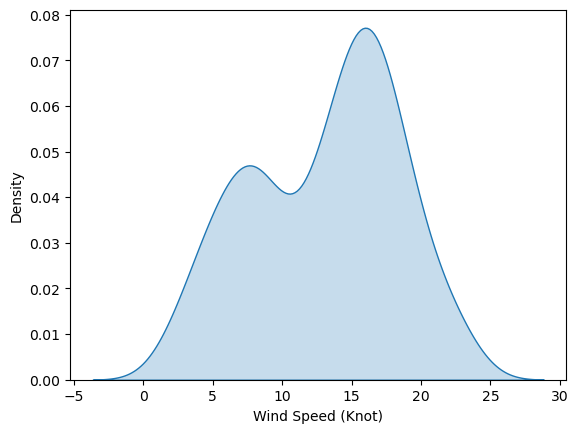

In [253]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)

In [254]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

In [255]:
rng2 = np.random.default_rng()
mu1, sigma1 = 13.0446, 5.2963
ts2 = pd.DataFrame(data=rng2.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts2

,Synthesised Wind Speed (Knot)
2023-11-08 00:00:33,6.393326
2023-11-08 00:01:33,18.270452
2023-11-08 00:02:33,9.092703
2023-11-08 00:03:33,11.569864
2023-11-08 00:04:33,12.528749
...,...
2023-11-08 01:35:33,18.702746
2023-11-08 01:36:33,5.769672
2023-11-08 01:37:33,17.920236
2023-11-08 01:38:33,9.188840


In [256]:
#rng1 = np.random.default_rng()
#shape = 5.0
#scale = 2.0
#values = weibull_min.rvs(2.1,8.5, size=100)
#ts2 = pd.DataFrame(data=rng1.weibull(15,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
#ts2

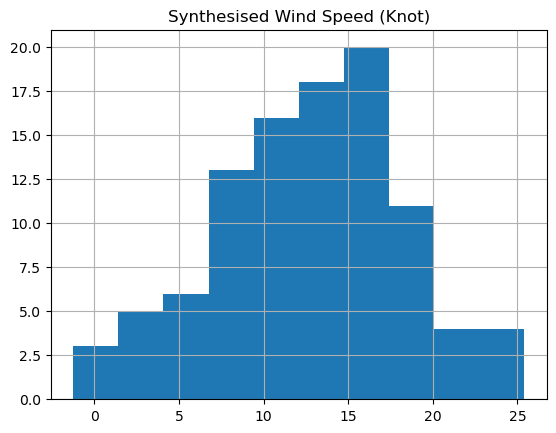

In [257]:
ts2.hist()
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

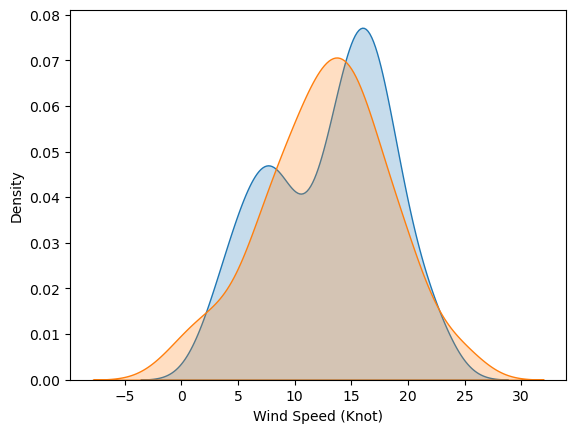

In [258]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

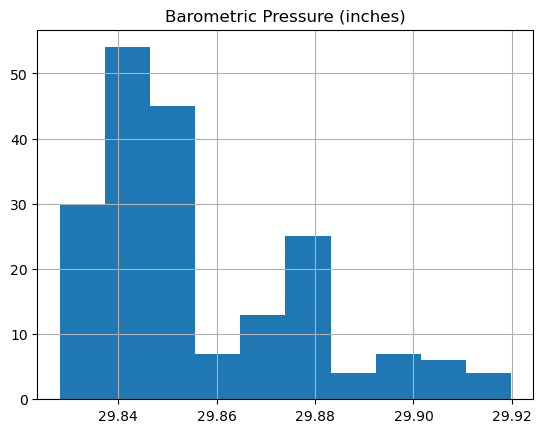

In [259]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [260]:
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

In [261]:
rng3 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.851928
2023-11-08 00:01:33,29.831170
2023-11-08 00:02:33,29.829820
2023-11-08 00:03:33,29.855190
2023-11-08 00:04:33,29.836475
...,...
2023-11-08 01:35:33,29.830813
2023-11-08 01:36:33,29.863892
2023-11-08 01:37:33,29.846813
2023-11-08 01:38:33,29.864988


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

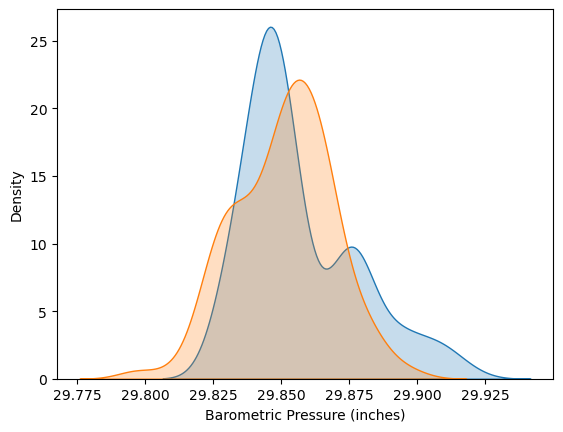

In [262]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

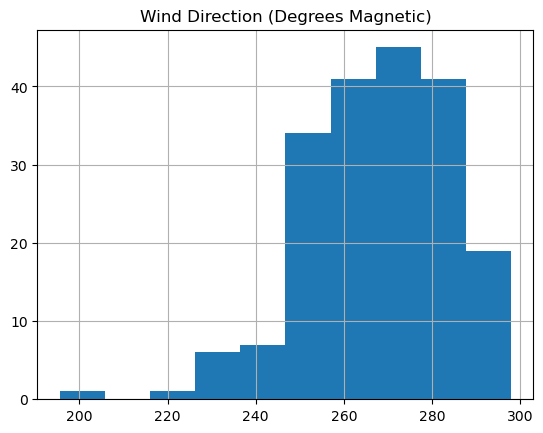

In [263]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

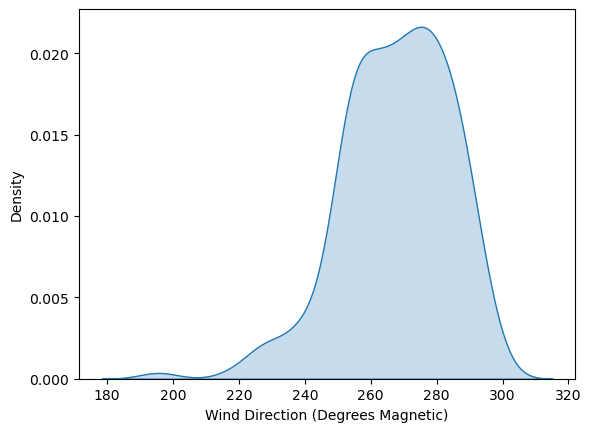

In [264]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [265]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,287.546543
2023-11-08 00:01:33,268.483483
2023-11-08 00:02:33,279.646930
2023-11-08 00:03:33,278.805190
2023-11-08 00:04:33,263.741006
...,...
2023-11-08 01:35:33,307.755698
2023-11-08 01:36:33,269.395198
2023-11-08 01:37:33,307.153809
2023-11-08 01:38:33,278.104057


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

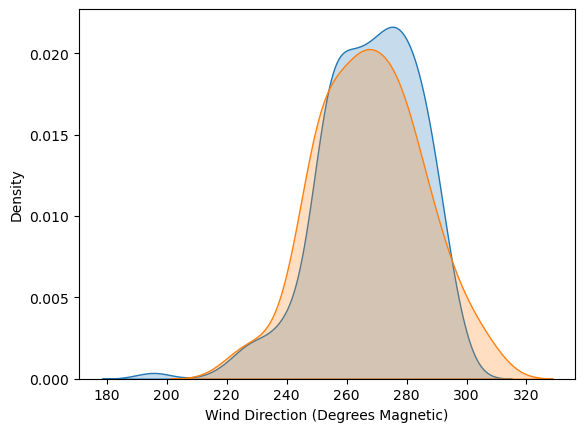

In [266]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

In [267]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [268]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [269]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

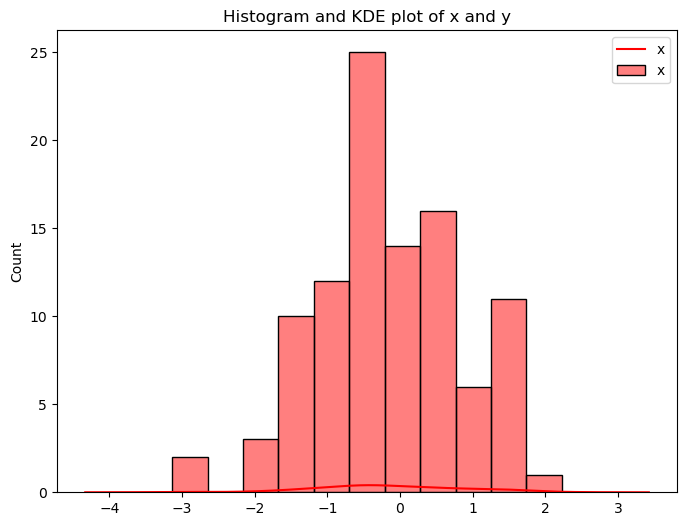

In [270]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [271]:
#x = df3(['Barometric Pressure (inches)'])
#print(x)
#sns.histplot(x)
#plt.show()

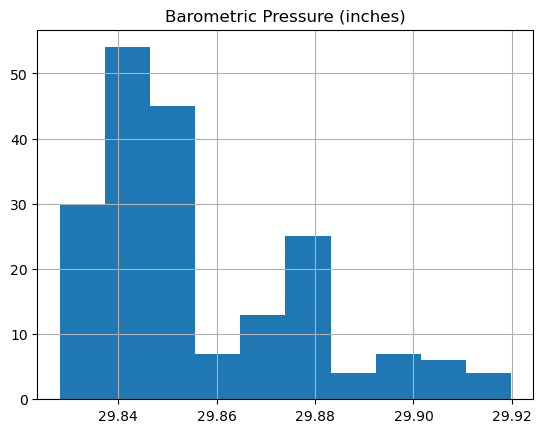

In [272]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [273]:
#idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx1

In [274]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [275]:
#ts1.hist('Synthesises Weibull')
plt.show()

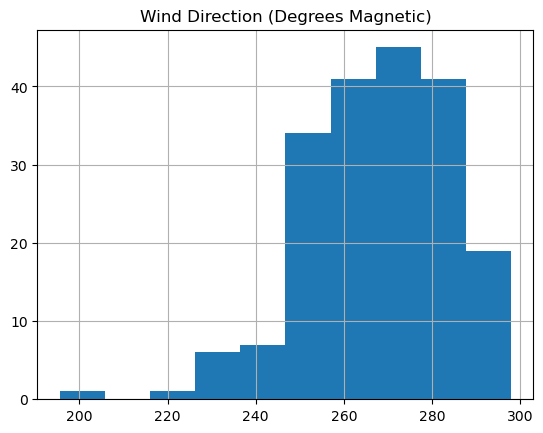

In [276]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

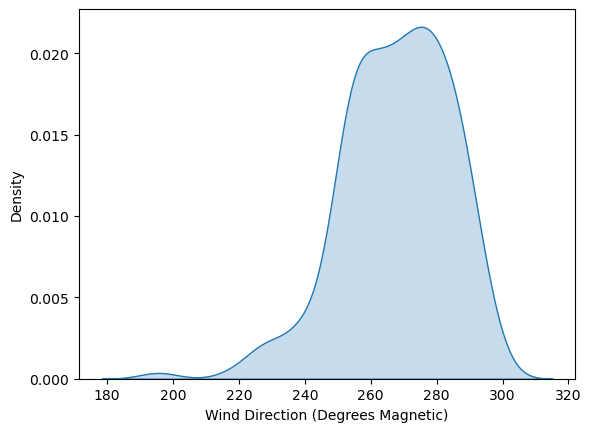

In [277]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [278]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,276.867957
2023-11-08 00:01:33,256.662950
2023-11-08 00:02:33,266.003445
2023-11-08 00:03:33,283.195754
2023-11-08 00:04:33,272.574750
...,...
2023-11-08 01:35:33,278.637796
2023-11-08 01:36:33,275.424160
2023-11-08 01:37:33,246.284788
2023-11-08 01:38:33,275.188562


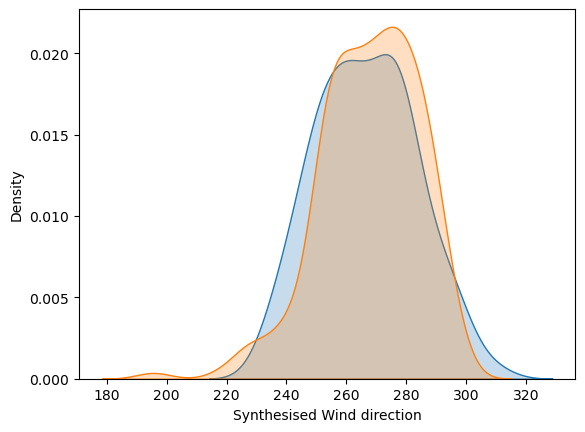

<AxesSubplot:ylabel='Count'>

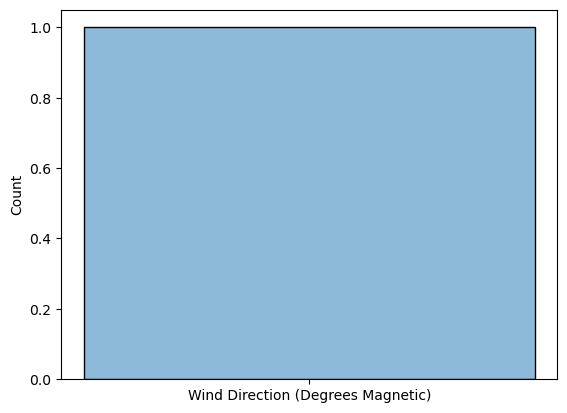

In [279]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [280]:
gdp_per_cap_syn = np.random.exponential(400, 100)
life_expect_syn = np.random.exponential(39, 100)
population_syn = np.random.exponential(20000, 100)
birth_rate_syn = np.random.exponential(7, 100)
neonatal_mortal_syn = np.random.exponential(2, 100)

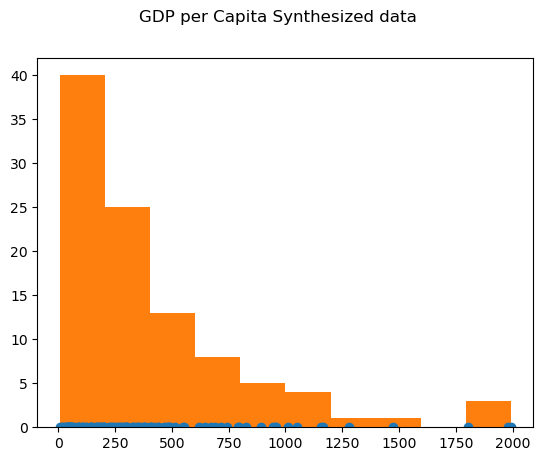

In [281]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

fit = stats.norm.pdf(gdp_per_cap_syn, np.mean(gdp_per_cap_syn), np.std(gdp_per_cap_syn))

plt.plot(gdp_per_cap_syn,fit,'o')

plt.hist(gdp_per_cap_syn)
plt.suptitle("GDP per Capita Synthesized data")
plt.show() 

In [282]:
result=pd.concat([ts1,ts2,ts3,ts4])
result

,Synthesised Air Temperature (Degrees C),Synthesised Wind Speed (Knot),Synthesised Barometric,Synthesised Wind direction
2023-11-08 00:00:33,11.141999,NaN,NaN,NaN
2023-11-08 00:01:33,9.933774,NaN,NaN,NaN
2023-11-08 00:02:33,10.664111,NaN,NaN,NaN
2023-11-08 00:03:33,9.289299,NaN,NaN,NaN
2023-11-08 00:04:33,10.099263,NaN,NaN,NaN
...,...,...,...,...
2023-11-08 01:35:33,NaN,NaN,NaN,278.637796
2023-11-08 01:36:33,NaN,NaN,NaN,275.424160
2023-11-08 01:37:33,NaN,NaN,NaN,246.284788
2023-11-08 01:38:33,NaN,NaN,NaN,275.188562


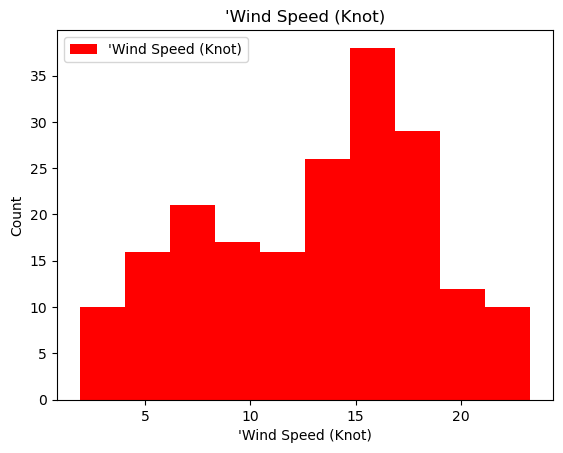

In [283]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

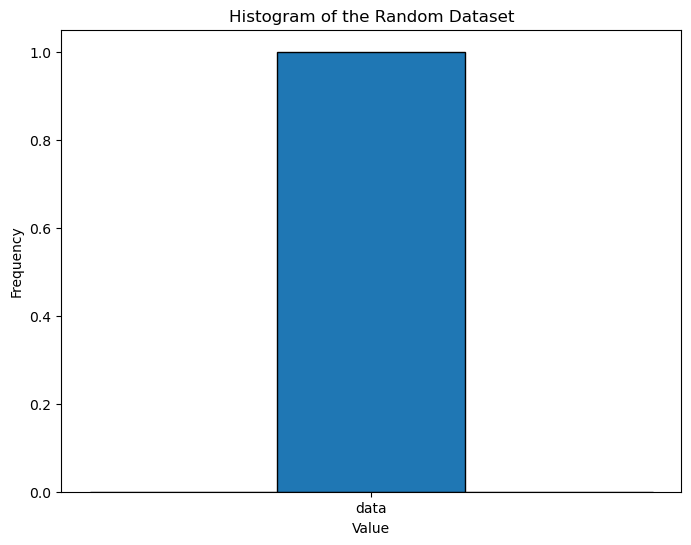

In [284]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [285]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [286]:
#rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

2.4023851090969544 0 24.988119126855434


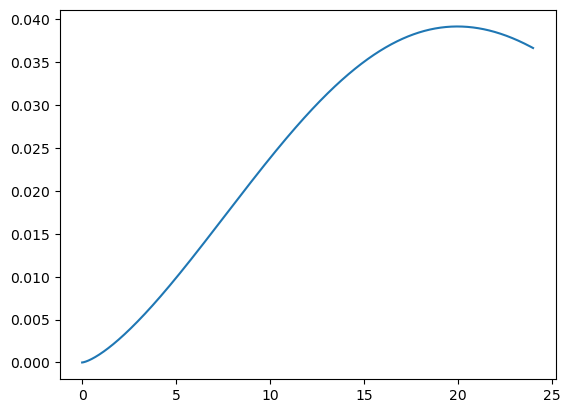

In [287]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

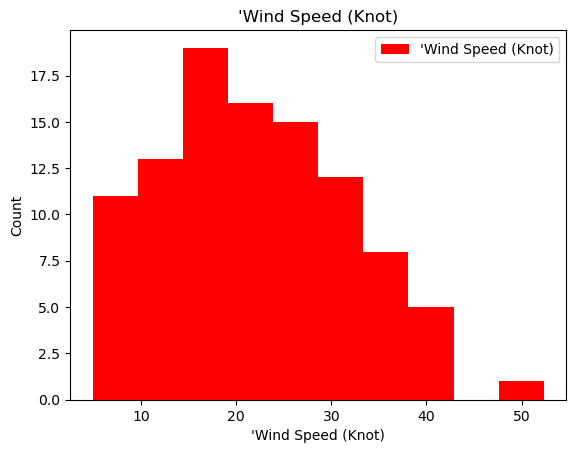

In [288]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:ylabel='Density'>

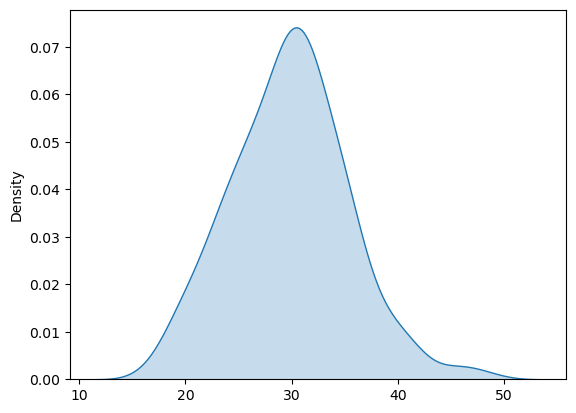

In [289]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

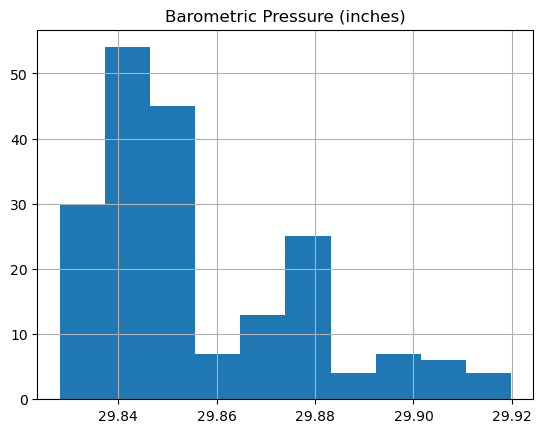

In [290]:
df3.hist('Barometric Pressure (inches)')
plt.show()
#plt.hist(df3('Barometric Pressure (inches)'))
#plt.show()

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

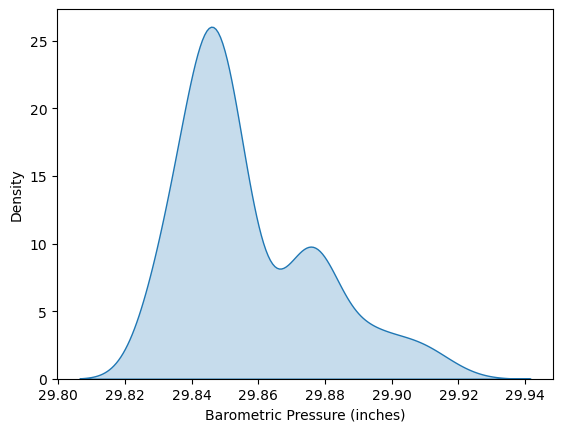

In [291]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

<AxesSubplot:ylabel='Density'>

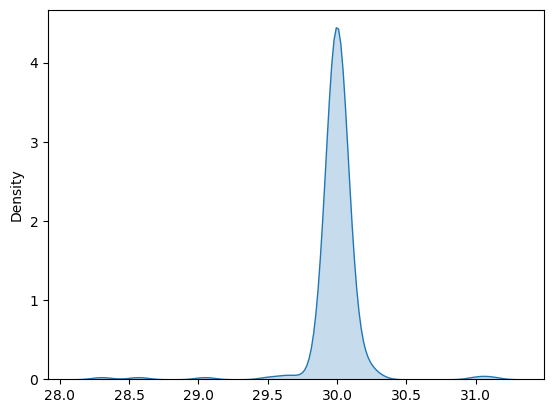

In [292]:
loc = 30
scale = .02

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

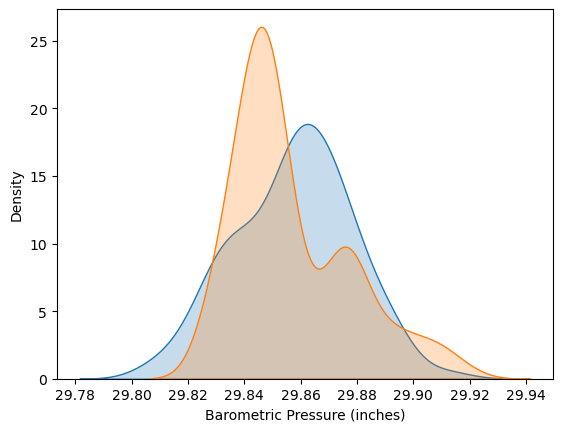

In [293]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 29.856636
std_dev = 0.020849

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
#print(dgamma_data)

In [294]:


# Normal distribution variables
mu1, sigma1 = 29.8566, .0208
#mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)
#normal2 = np.random.normal(mu2, sigma2, 180)

# Weibull distribution variables
#a1, b1 = 2.1, 8.5
#a2, b2 = 5, 2
#weibull1 = np.random.weibull(a1, 180) * b1
#weibull2 = np.random.weibull(a2, 180) * b2

# Create dataframe
df23 = pd.DataFrame({
    'normal1': normal1,
  #  'normal2': normal2,
    #'weibull1': weibull1,
    #'weibull2': weibull2
})

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

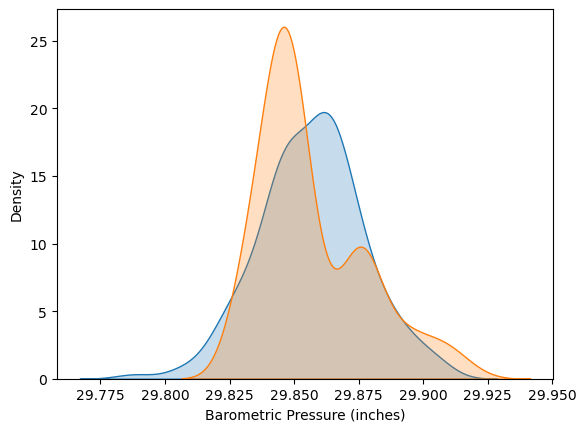

In [295]:
sns.kdeplot(normal1,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [296]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,288.444807
2023-11-08 00:01:33,273.281391
2023-11-08 00:02:33,254.583854
2023-11-08 00:03:33,254.951616
2023-11-08 00:04:33,259.441037
...,...
2023-11-08 01:35:33,282.840199
2023-11-08 01:36:33,259.738982
2023-11-08 01:37:33,250.769780
2023-11-08 01:38:33,265.372038


In [297]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

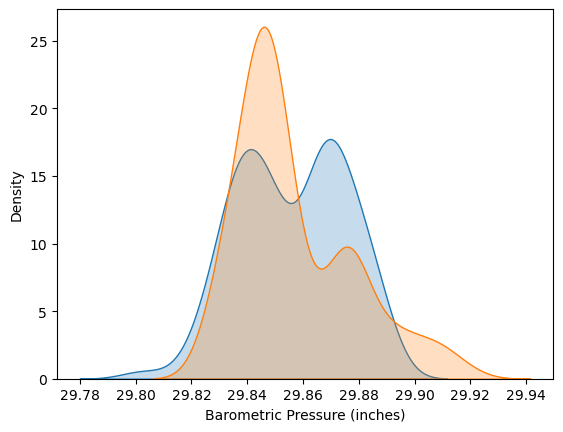

In [298]:
import numpy as np
from scipy.stats import dweibull
mean = 29.8566
std_dev = 0.02

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)


In [299]:
import numpy as np
from scipy.stats import weibull_min



In [300]:
mean = 30
std_dev = 0.02
min_val = 29.82
max_val = 29.91

# Calculate the shape and scale parameters
c = (max_val - mean) / (mean - min_val)
k = np.log(2) / np.log((c + 1) / c)
#scale = 1 # Set the scale parameter to a positive value

# Generate 1000 random numbers from the Weibull distribution
#data = weibull_min.rvs(k, loc=mean, scale=scale, size=1000)

C:\Users\irivyo\AppData\Local\Temp\ipykernel_3504\4112933684.py:8: RuntimeWarning: invalid value encountered in log
  k = np.log(2) / np.log((c + 1) / c)


Rayleigh PDF 

In [301]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 29.856636
std_dev = 0.020849

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 29.856636,0.020849 , size=100)

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

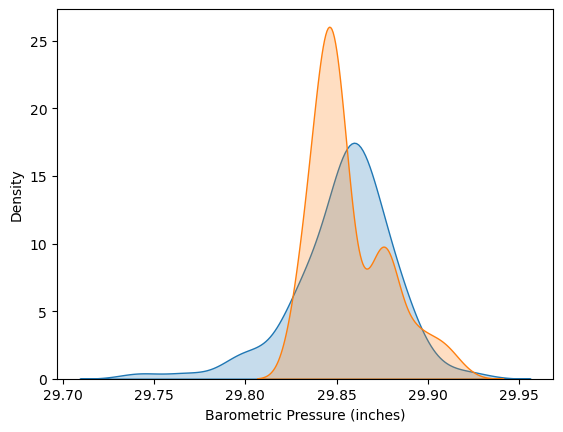

In [302]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [303]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 29.8566
std_dev = 0.0208
min_val = 29.8282
max_val = 29.9198

# Calculate the shape and scale parameters
c = (mean - min_val) / std_dev
k = np.log(2) / np.log((c + 1) / c)
scale = std_dev / (c + 1)

# Generate 1000 random numbers from the asymmetric Laplace distribution
data2 = laplace_asymmetric.rvs(k, loc=mean, scale=scale, size=1000)

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

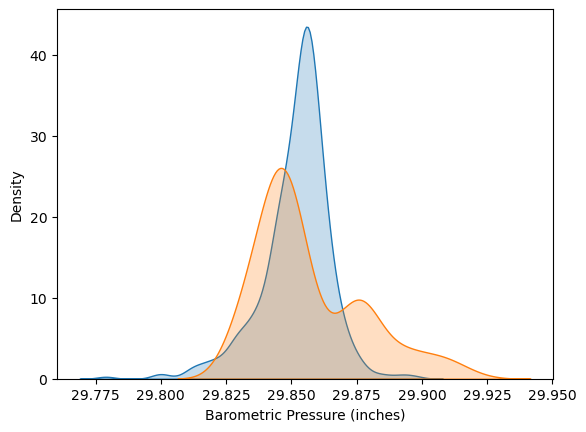

In [304]:
sns.kdeplot(data2,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [305]:
import numpy as np
from scipy.stats import poisson

mean = 29.85
std_dev = 0.02
min_val = 29.82
max_val = 29.91

# Calculate the lambda parameter
#lam = mean - min_val

# Generate 1000 random numbers from the Poisson distribution
data3 = poisson.rvs(29.85, size=1000)

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

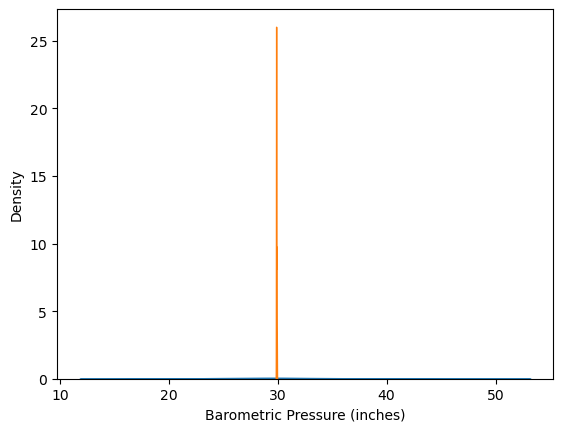

In [306]:
sns.kdeplot(data3,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [307]:
mean = 29.85
std_dev = 0.02
#min_val = 29.82
#max_val = 29.91

# Generate a normal distribution with the given mean and standard deviation
normal_dist = np.random.normal(mean, std_dev, 1000)

# Calculate the probability of getting a value between min_val and max_val


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

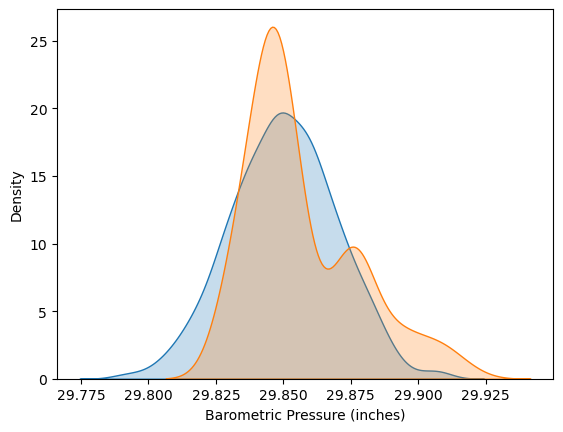

In [308]:
sns.kdeplot(normal_dist,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)